In [16]:
import pandas as pd

df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df.dropna(subset=['Genre', 'Director', 'Actor 1', 'Rating'], inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

le_genre = LabelEncoder()
le_director = LabelEncoder()

df['Genre_Encoded'] = le_genre.fit_transform(df['Genre'])
df['Director_Encoded'] = le_director.fit_transform(df['Director'])

df[['Genre', 'Genre_Encoded', 'Director', 'Director_Encoded']].head()

,Genre,Genre_Encoded,Director,Director_Encoded
1,Drama,261,Gaurav Bakshi,784
3,"Comedy, Romance",206,Ovais Khan,1691
5,"Comedy, Drama, Musical",176,Rahul Rawail,1939
6,"Drama, Romance, War",324,Shoojit Sircar,2566
8,"Horror, Mystery, Thriller",360,Allyson Patel,168


from matplotlib import pyplot as plt
_df_0['Genre_Encoded'].plot(kind='hist', bins=20, title='Genre_Encoded')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Director_Encoded'].plot(kind='hist', bins=20, title='Director_Encoded')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Director').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Genre_Encoded', y='Director_Encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Genre_Encoded'].plot(kind='line', figsize=(8, 4), title='Genre_Encoded')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Director_Encoded'].plot(kind='line', figsize=(8, 4), title='Director_Encoded')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Director'].value_counts()
    for x_label, grp in _df_7.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Director')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='Genre_Encoded', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Director'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Genre_Encoded', y='Director', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Director_Encoded', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Director'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Director_Encoded', y='Director', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [19]:
import pandas as pd

actor_counts = df['Actor 1'].value_counts()
top_actors = actor_counts.nlargest(10).index
df_actors = pd.get_dummies(df['Actor 1'], prefix='Actor')

top_actor_cols = ['Actor_' + actor for actor in top_actors]
df_actors = df_actors.reindex(columns=top_actor_cols, fill_value=0)

print("Top 10 actors have been one-hot encoded.")
df_actors.head()

Top 10 actors have been one-hot encoded.


,Actor_Jeetendra,Actor_Dharmendra,Actor_Mithun Chakraborty,Actor_Ashok Kumar,Actor_Rajesh Khanna,Actor_Amitabh Bachchan,Actor_Dev Anand,Actor_Shashi Kapoor,Actor_Akshay Kumar,Actor_Sanjay Dutt
1,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False


In [20]:
X = pd.concat([df[['Genre_Encoded', 'Director_Encoded']], df_actors], axis=1)
y = df['Rating']

print("Final features (X) and target (y) are ready.")
X.head()

Final features (X) and target (y) are ready.


,Genre_Encoded,Director_Encoded,Actor_Jeetendra,Actor_Dharmendra,Actor_Mithun Chakraborty,Actor_Ashok Kumar,Actor_Rajesh Khanna,Actor_Amitabh Bachchan,Actor_Dev Anand,Actor_Shashi Kapoor,Actor_Akshay Kumar,Actor_Sanjay Dutt
1,261,784,False,False,False,False,False,False,False,False,False,False
3,206,1691,False,False,False,False,False,False,False,False,False,False
5,176,1939,False,False,False,False,False,False,False,False,False,False
6,324,2566,False,False,False,False,False,False,False,False,False,False
8,360,168,False,False,False,False,False,False,False,False,False,False


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data has been split into training and testing sets.")

Data has been split into training and testing sets.


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [23]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1.7252097134912747
R² Score: 0.10604881045879067


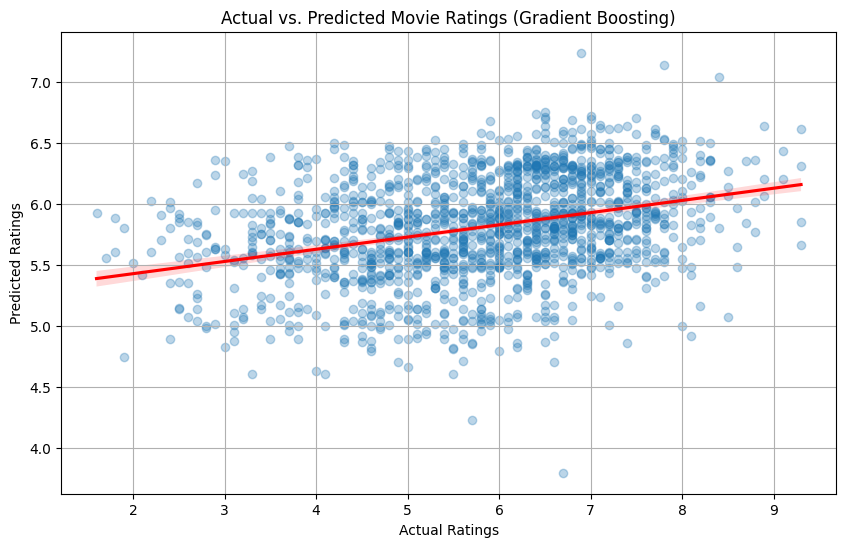

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Movie Ratings (Gradient Boosting)")
plt.grid(True)
plt.show()